In [21]:
%pip install scipy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
def find_root_newton_raphson(f, f_deriv, x):
    for i in range(100):
        if abs(f(x)) < 0.001:
            return x
        x = x - f(x) / f_deriv(x)
    return None

In [23]:
f = lambda x: (x - 1) ** 4 + x ** 2

In [24]:
def find_root(f, a, b, precision=0.001):
    while abs(b-a) > precision:
        c = (a+b)/2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a+b)/2

In [25]:
def f_prime(x):
    return 4 * (x-1) ** 3 + 2 * x

In [26]:
minimum_x = find_root(f_prime, -10, 10)
f_prime(minimum_x)

0.0013328122995517333

x_min: .02f, f(x_min): .02f (0.41024548853416215, 0.2892734239377779)


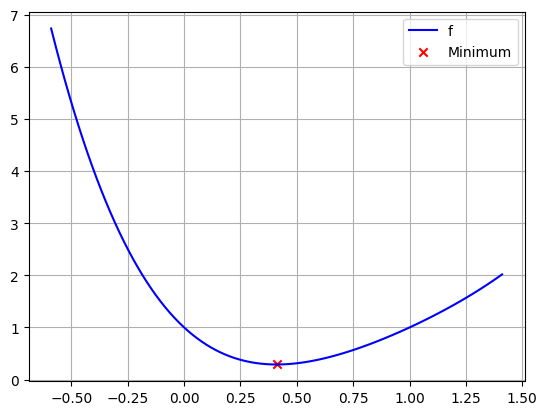

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
res = minimize_scalar(f, method='brent')
print('x_min: .02f, f(x_min): .02f',  (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

In [28]:
def gradient_descent(f, f_prime, start, learning_rate = 0.1):
    xk = start
    while True:
        xk_plus_1 = xk - learning_rate * f_prime(xk)
        if abs(xk_plus_1 - xk) < 0.01:
            break
        xk = xk_plus_1
    return xk
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: 0.2f, f(x_min): 0.2f",  (x_min, f_min))

xmin: 0.2f, f(x_min): 0.2f (0.2786398417378328, 0.3484151883931607)


In [29]:
A = np.array([[2,1],[-4,5],[1,-2]])
b = np.array([10,8,3])
c = np.array([-1,-2])

In [30]:
from scipy.optimize import linprog


def solve_linear_problem(A, b, c):
    res = linprog(c, A_ub=A, b_ub=b, method="highs")
    return res.fun, res.x

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)

The optimal value is:  -11.0  and is reached for x =  [3. 4.]


In [31]:
f_prime = lambda x: 4 * ((x - 1) ** 3) + 2 * x
guess = 0.1
root_newton_raphson = find_root_newton_raphson(f, f_prime, guess)
if root_newton_raphson:
    print("Root (Newton-Raphson Method): % .2f" % root_newton_raphson)
else:
    print("Root (Newton-Raphson Method): No valid result")

Root (Newton-Raphson Method): No valid result
